# Estudo de caso com o framework MathFeature
- https://bonidia.github.io/MathFeature/

Utilização por linha de comando:
- git clone https://github.com/Bonidia/MathFeature.git MathFeature
- cd MathFeature
- pip3 install -r requirements.txt
- apt-get -y install python3-igraph

## Baixando sequências de repositórios públicos
- GENCODE: https://www.gencodegenes.org/
- PHYTOZOME: https://phytozome-next.jgi.doe.gov/
- GREENC: http://greenc.sequentiabiotech.com/wiki/Main_Page

## Etapas de pré-processamento

- Contagem da quantidade de sequências;
- Amostragem;
- Remoção de redundância;
- Eliminação de ruídos.
- Extração de características;
- Composição da base de dados

## Modelo: Arabidopsis thaliana
Base (lncRNA) GREENC: http://greenc.sequentiabiotech.com/wiki/Species:Arabidopsis_thaliana

Base (mRNA) Phytozome: https://data.jgi.doe.gov/refine-download/phytozome?genome_id=167

#### Divisão da base em treino e teste

In [1]:
#Base lncRNA e mRNA
import os 
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

def split(finput, test_rate):
    dataset = pandas.read_csv(finput)
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_rate)
    train = pandas.concat([X_train, y_train], axis=1)
    test = pandas.concat([X_test, y_test], axis=1)
    
    trainData = os.path.splitext(finput)[0]+"_train"+os.path.splitext(finput)[1]
    testData = os.path.splitext(finput)[0]+"_test"+os.path.splitext(finput)[1]
    train.to_csv(trainData, index=False)
    test.to_csv(testData, index=False)    
    return                             


# Aplica a divisão treino e teste nas bases mRNA e lncRNA

split('bases/mRNA.csv',0.3)
split('bases/lncRNA.csv',0.3)

# carrega a base de dados treino lncRNA e mRNA
lncRNA_data = pandas.read_csv('bases/lncRNA_train.csv')
mRNA_data = pandas.read_csv('bases/mRNA_train.csv')
dadosTreino = pandas.concat([lncRNA_data,mRNA_data])

In [2]:
dadosTreino.columns

Index(['nameseq', 'maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'fickett_score-ORF',
       'fickett_score-full-sequence', 'A', 'C', 'G', 'T', 'AA', 'AC', 'AG',
       'AT', 'CA', 'CC', 'CG', 'CT', 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG',
       'TT', 'AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA',
       'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG',
       'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA',
       'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG',
       'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA',
       'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG',
       'TGT', 'TTA', 'TTC', 'TTG', 'TTT', 'label'],
      dtype='object')

In [3]:
## Remove column nameseq
dadosTreino.drop(columns='nameseq', inplace=True)

## Normalização dos dados

In [4]:
## Transform categorical in binary class values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dadosTreino["label"] = le.fit_transform(dadosTreino["label"])

In [5]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
cols = dadosTreino.iloc[:, 0:11].columns
dadosTreino[cols] = pandas.DataFrame(scaler.fit_transform(dadosTreino.iloc[:, 0:11]), columns=dadosTreino.iloc[:, 0:11].columns)

In [6]:
dadosTreino

,maximum_ORF_length,minimum_ORF_length,std_ORF_length,average_ORF_length,cv_ORF_length,maximum_GC_content_ORF,minimum_GC_content_ORF,std_GC_content_ORF,average_GC_content_ORF,cv_GC_content_ORF,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,label
0,0.041608,0.035948,0.114076,0.154684,0.128968,0.567460,0.568831,0.148484,0.575410,0.116276,...,0.018868,0.018868,0.022642,0.011321,0.018868,0.022642,0.030189,0.030189,0.030189,0
1,0.025713,0.016340,0.073255,0.084967,0.150770,0.466667,0.417143,0.149619,0.468274,0.143971,...,0.025932,0.021070,0.016207,0.014587,0.022690,0.032415,0.014587,0.038898,0.047002,0
2,0.041141,0.016340,0.091118,0.106209,0.150029,0.698148,0.635491,0.210943,0.716759,0.132611,...,0.024359,0.019231,0.016667,0.024359,0.029487,0.008974,0.024359,0.028205,0.039744,0
3,0.036933,0.006536,0.105814,0.107843,0.171586,0.543038,0.260714,0.381069,0.422612,0.406303,...,0.046259,0.016327,0.006803,0.002721,0.025850,0.023129,0.048980,0.014966,0.057143,0
4,0.050023,0.006536,0.106352,0.065686,0.283141,0.619048,0.391071,0.348973,0.546184,0.287899,...,0.032043,0.014686,0.008011,0.017356,0.034713,0.016021,0.038718,0.030708,0.036048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,0.030856,0.013072,0.071549,0.074230,0.168562,0.695960,0.391071,0.507622,0.576205,0.396965,...,0.015331,0.027178,0.016028,0.024390,0.013937,0.014634,0.010453,0.030662,0.018815,1
2101,0.017298,0.055556,0.027703,0.079739,0.060757,0.524561,0.535521,0.123972,0.543546,0.102772,...,0.019162,0.028743,0.010778,0.011976,0.017964,0.023952,0.019162,0.020359,0.027545,1
2102,0.055166,0.035948,0.162723,0.157516,0.180658,0.613889,0.391071,0.477085,0.564993,0.380488,...,0.016760,0.026536,0.020950,0.022346,0.016760,0.008380,0.019553,0.025140,0.019553,1
2103,0.040673,0.026144,0.097725,0.093137,0.183491,0.688235,0.469286,0.375200,0.557285,0.303371,...,0.016529,0.008264,0.024793,0.041322,0.033058,0.033058,0.008264,0.057851,0.049587,1


In [7]:
#Divide a base entre os previsores e classe
colunas = dadosTreino.columns.drop('label')

# Gera os previsores e classe (X e y)
X = dadosTreino[colunas].values
y = dadosTreino['label']

## Gera os dados de teste
# carrega a base de dados teste lncRNA e mRNA
lncRNA_test = pandas.read_csv('bases/lncRNA_test.csv')
mRNA_test = pandas.read_csv('bases/mRNA_test.csv')
dados = pandas.concat([lncRNA_test,mRNA_test])

dadosTeste = dados.columns.drop('label')
X_teste = dados[dadosTeste].values

##Remove categorical column nameseq
import numpy as np
X_teste = np.delete(X_teste, 0, axis=1)

##Label Encoder Tranform
y_teste = dados['label']
y_teste = le.fit_transform(y_teste)

#### Atributos utilizados: 

In [8]:
# Exibe a quantidade de atributos
print("Columns size >>> %d"%len(colunas))

# Exibe o nome dos atributos
print(dadosTreino.columns)

Columns size >>> 96
Index(['maximum_ORF_length', 'minimum_ORF_length', 'std_ORF_length',
       'average_ORF_length', 'cv_ORF_length', 'maximum_GC_content_ORF',
       'minimum_GC_content_ORF', 'std_GC_content_ORF',
       'average_GC_content_ORF', 'cv_GC_content_ORF', 'fickett_score-ORF',
       'fickett_score-full-sequence', 'A', 'C', 'G', 'T', 'AA', 'AC', 'AG',
       'AT', 'CA', 'CC', 'CG', 'CT', 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG',
       'TT', 'AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA',
       'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG',
       'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA',
       'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG',
       'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA',
       'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG',
       'TGT', 'TTA', 'TTC', 'TTG', 'TTT', 'label'],
      dtype='object')


In [9]:
print(X.shape, y.shape, X_teste.shape, y_teste.shape)

(4209, 96) (4209,) (1805, 96) (1805,)


In [10]:
# Modelo preditivo Decision Tree
# instancia um DecisionTreeClassifier
clf = DecisionTreeClassifier()
# treina o knn
clf.fit(X, y)

y_pred = clf.predict(X_teste)
#print(y_pred)

 # gerar score baseado na acurácia
acuracidade = round(accuracy_score(y_teste,y_pred)*100,2)
print(acuracidade)

67.98


## (1) Análise dos componentes principais

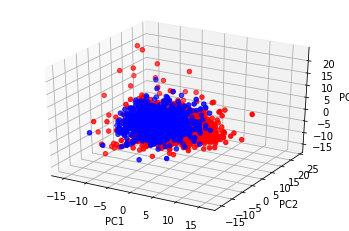

In [11]:
# Redução da dimensionalidade
#Principal Component Analysis (PCA)
import pandas 
import numpy 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn import preprocessing

# criando um dicionario para mapear cada classe para uma cor
classe_cor = {0 : 'red', 
              1 : 'blue'}
# criando uma lista com as cores de cada exemplo
cores = [classe_cor[nome] for nome in dadosTreino['label']]

data_scaled = pandas.DataFrame(preprocessing.scale(dadosTreino),columns = dadosTreino.columns) 

# PCA
pca = PCA(n_components=3)
#pca = PCA()
pc = pca.fit_transform(data_scaled)
pca.n_components_

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pc[:,0], pc[:,1],pc[:,2], color=cores)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


## (2) Avaliação dos modelos preditivos

### Validação Cruzada _(Cross-Validation)_



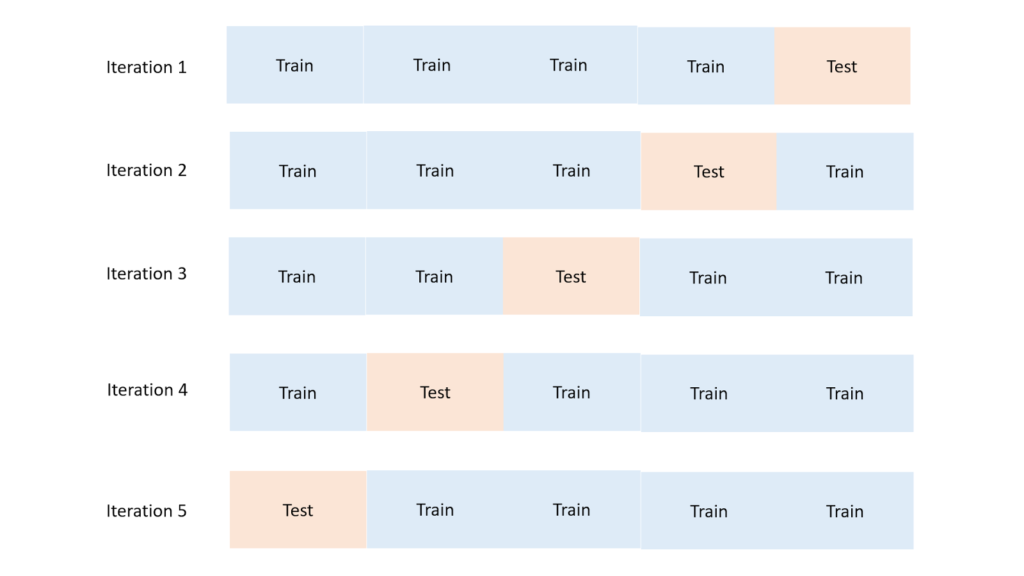

In [12]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

### Aplica seleção de features (Filtro)

In [37]:
#Feature selection with Mutual Information 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=48)

selector.fit(X, y)

SelectKBest(k=48, score_func=<function mutual_info_classif at 0x7f7e67de3840>)

In [38]:
# to remove the rest of the features:
X = selector.transform(X)
X_teste = selector.transform(X_teste)

### Validação cruzada no conjunto reduzido

In [39]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

In [40]:
# instancia um DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [41]:
resultado = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

print('O score cross-validado do Decision Tree é:', resultado.mean())

O score cross-validado do Decision Tree é: 0.7769002375296912


In [42]:
resultado

array([0.80522565, 0.78859857, 0.77434679, 0.76009501, 0.77434679,
       0.7695962 , 0.80760095, 0.76247031, 0.77672209, 0.75      ])

In [43]:
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
clf_pred = clf.predict(X_teste)
clf_pred

array([0, 0, 1, ..., 1, 0, 1])

# Matriz de Confusão 

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

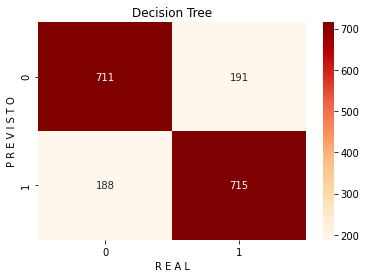

In [46]:
sns.heatmap(confusion_matrix(y_teste, clf_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Decision Tree')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.


<a name="precision"></a>

$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$

<a name="accuracy"></a>

$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$

<a name="accuracy"></a>

$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$

<a name="accuracy"></a>

$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$

### Importando métricas do Sklearn

In [47]:
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

### Revocação

In [48]:
recall_score(y_teste,clf_pred)

0.7918050941306756

### Acuracidade

In [49]:
accuracy_score(y_teste,clf_pred)

0.7900277008310249

### Precisão

In [50]:
precision_score(y_teste,clf_pred)

0.7891832229580574

### F1-Score

In [51]:
f1_score(y_teste,clf_pred)

0.7904919845218353

## Avaliando diferentes modelos de predição

#### Árvore de Decisão 

In [52]:
#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
# instancia um DecisionTreeClassifier
clf_DT = DecisionTreeClassifier()

# treina o classificador
clf_DT.fit(X, y)
DT_pred = clf_DT.predict(X_teste)

#### Algoritmo KNN

In [53]:
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# treina o classificador
clf_KNN.fit(X, y)
KNN_pred = clf_KNN.predict(X_teste)

#### Algoritmo Randon Forest 

In [54]:
#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')

# treina o classificador
clf_RF.fit(X, y)
RF_pred = clf_RF.predict(X_teste)

### (2) Matriz Confusão

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#### Árvore de Decisão

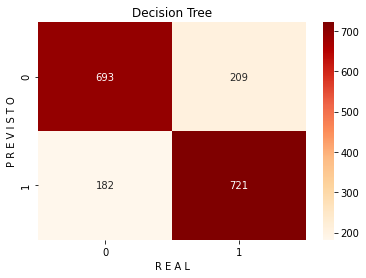

In [56]:
sns.heatmap(confusion_matrix(y_teste, DT_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Decision Tree')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

#### KNN

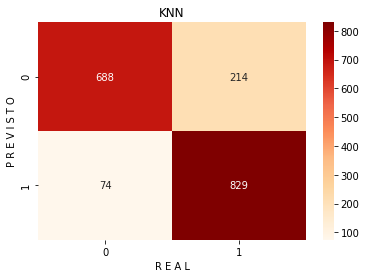

In [57]:
sns.heatmap(confusion_matrix(y_teste, KNN_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('KNN')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

#### Randon Forest

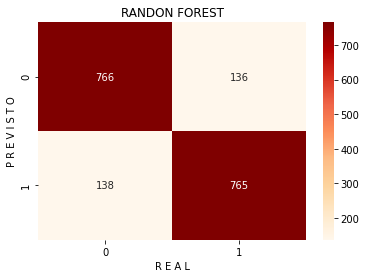

In [58]:
sns.heatmap(confusion_matrix(y_teste, RF_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('RANDON FOREST')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

### (3) Avaliando os modelos

In [59]:
# Acuracidade
print("ACC (DT) :%.2f" %(accuracy_score(y_teste,DT_pred))) 
print("ACC (KNN) :%.2f" %(accuracy_score(y_teste,KNN_pred))) 
print("ACC (RF) :%.2f" %(accuracy_score(y_teste,RF_pred))) 

#Revocação
print("Recall (DT) :%.2f" %(recall_score(y_teste,DT_pred))) 
print("Recall (KNN) :%.2f" %(recall_score(y_teste,KNN_pred))) 
print("Recall (RF) :%.2f" %(recall_score(y_teste,RF_pred))) 

#Precisão
print("Precision (DT) :%.2f" %(precision_score(y_teste,DT_pred))) 
print("Precision (KNN) :%.2f" %(precision_score(y_teste,KNN_pred))) 
print("Precision (RF) :%.2f" %(precision_score(y_teste,RF_pred))) 

#F1-score
print("F1-score (DT) :%.2f" %(f1_score(y_teste,DT_pred))) 
print("F1-score (KNN) :%.2f" %(f1_score(y_teste,KNN_pred))) 
print("F1-score (RF) :%.2f" %(f1_score(y_teste,RF_pred))) 


ACC (DT) :0.78
ACC (KNN) :0.84
ACC (RF) :0.85
Recall (DT) :0.80
Recall (KNN) :0.92
Recall (RF) :0.85
Precision (DT) :0.78
Precision (KNN) :0.79
Precision (RF) :0.85
F1-score (DT) :0.79
F1-score (KNN) :0.85
F1-score (RF) :0.85


### (4) Curvas ROC e AUC 

Em aprendizagem de máquina, a medição de desempenho é uma tarefa crucial. As métricas ROC (Receiver Operating Characteristics) e AUC (Area Under The Curve) são as mais utilizadas para medir o desempenho de modelos de classificação.

ROC é uma curva de probabilidade. Ela é criada traçando a taxa verdadeiro-positivo contra a taxa de falsos-positivos. Ou seja, numero de vezes que o classificador acertou a predição conta o número de vezes que o classificador errou a predição.

O AUC representa o grau ou medida de separabilidade. Quanto maior o AUC, melhor o modelo está em prever 0s como 0s e 1s como 1s. AUC resume a curva ROC num único valor, calculando a “área sob a curva”.

Um modelo excelente tem AUC próximo ao 1, o que significa que tem boa medida de separabilidade. Um modelo pobre tem AUC próximo do 0, o que significa que tem a pior medida de separabilidade, ou seja, está prevendo 0s como 1s e 1s como 0s. E quando a AUC é 0,5, significa que o modelo não tem capacidade de separação de classe.

O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos. 
* O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos. 
* Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Sem habilidade: ROC AUC=0.500
Decision Tree: ROC AUC=0.784
KNN: ROC AUC=0.898
Randon Forest: ROC AUC=0.926


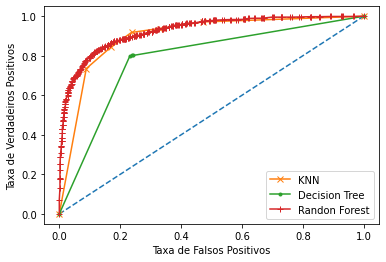

In [61]:
ns_probs = [0 for _ in range(len(y_teste))] # gerar lista de zeros (sem habilidade)
ns_auc = roc_auc_score(y_teste, ns_probs)

#Decision Tree
DT_probs = clf_DT.predict_proba(X_teste)
DT_probs = DT_probs[:,1]
DT_auc = roc_auc_score(y_teste, DT_probs)

#KNN
KNN_probs = clf_KNN.predict_proba(X_teste)
KNN_probs = KNN_probs[:,1]
KNN_auc = roc_auc_score(y_teste, KNN_probs)

#Randon Forest
RF_probs = clf_RF.predict_proba(X_teste)
RF_probs = RF_probs[:,1]
RF_auc = roc_auc_score(y_teste, RF_probs)

print('Sem habilidade: ROC AUC=%.3f' %(ns_auc))
print('Decision Tree: ROC AUC=%.3f' %(DT_auc))
print('KNN: ROC AUC=%.3f' %(KNN_auc))
print('Randon Forest: ROC AUC=%.3f' %(RF_auc))

# calcular a curva ROC
ns_tfp, ns_tvp, _ = roc_curve(y_teste, ns_probs)
DT_tfp, DT_tvp, _ = roc_curve(y_teste, DT_probs)
KNN_tfp, KNN_tvp, _ = roc_curve(y_teste, KNN_probs)
RF_tfp, RF_tvp, _ = roc_curve(y_teste, RF_probs)

plt.plot(ns_tfp, ns_tvp, linestyle='--')
plt.plot(KNN_tfp, KNN_tvp, marker='x', label='KNN')
plt.plot(DT_tfp, DT_tvp, marker='.', label='Decision Tree')
plt.plot(RF_tfp, RF_tvp, marker='+', label='Randon Forest')


plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc=4)

plt.show()